<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/GeoPandas/Geo_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geo Pandas

Lidando com dados de Geolocalização da Cidade de São paulo
Dados Sociodemográficos, e com localização de estruturas, como museus, escolas, prefeituras.

### Pacotes
  * Geo Pandas
  * Tobler
  * PyGeos

In [1]:
#!pip install geopandas
#!pip install tobler

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from tobler.area_weighted import area_interpolate
from tobler.dasymetric import masked_area_interpolate

In [3]:
from google.colab import drive
drive.mount ('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [4]:
distrito = gpd.read_file('/drive/MyDrive/Grupo Estudos/Geo Pandas/SAD69-96_SHP_distrito/SAD69-96_SHP_distrito_polygon.shp').set_crs(epsg=5533)

In [5]:
distrito.head()

,ds_areamt,ds_subpref,ds_sigla,ds_nome,ds_areakm,ds_cd_sub,ds_codigo,geometry
0,None,SANTANA-TUCURUVI,MAN,MANDAQUI,None,05,51,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,None,MOOCA,MOO,MOOCA,None,25,53,"POLYGON ((338394.421 7394310.666, 338407.303 7..."
2,None,CASA VERDE-CACHOEIRINHA,LIM,LIMAO,None,04,50,"POLYGON ((329124.990 7402389.472, 329126.801 7..."
3,None,JABAQUARA,JAB,JABAQUARA,None,15,38,"POLYGON ((331969.718 7385760.630, 331977.816 7..."
4,None,CIDADE ADEMAR,CAD,CIDADE ADEMAR,None,16,22,"POLYGON ((332455.670 7378656.488, 332449.680 7..."


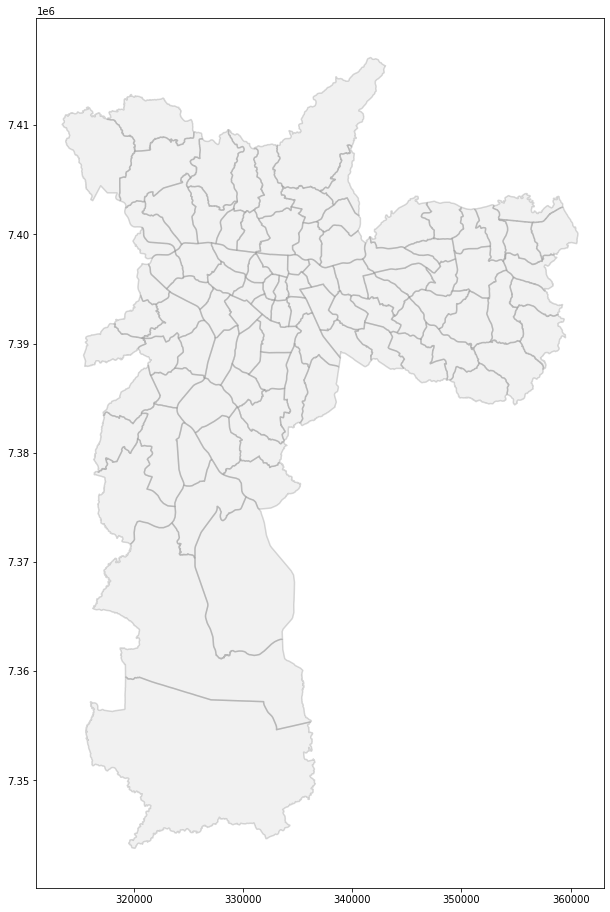

In [6]:
fi, ax = plt.subplots(figsize=(18,16))
#Distrito
distrito.boundary.plot(ax=ax, alpha=0.3, color='gray');
distrito.plot(ax=ax, alpha=0.3, color='lightgray');

In [7]:
idh = pd.read_csv('/drive/MyDrive/Grupo Estudos/Geo Pandas/IDH/CSV/DEINFO_IDH_UDH_2000_2010_Dados.csv', encoding='latin-1')
idh.sort_values('CODDIST').head()

,COD_ID,NOME_UDH,CODMUN6,NOME_MUN,CODUF,NOME_UF,CODRM,NOME_RM,ANO,ESPVIDA,...,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,CODDIST,DISTRITO,REGIAO8,PREFREG
1033,1355030818034,Santa Clara : Escola Estadual Professor Mário ...,355030,São Paulo (SP),35,SP,63500,RM São Paulo (SP),2000,76.63,...,0.647,0.727,0.801,0.699,0.861,0.854,1,Água Rasa,Leste 1,Mooca
2636,1355030818044,Oratório : Evolucao Instituto de Ensino Unidad...,355030,São Paulo (SP),35,SP,63500,RM São Paulo (SP),2010,79.68,...,0.670,0.786,0.823,0.745,0.911,0.822,1,Água Rasa,Leste 1,Mooca
1021,1355030818021,Oratório : Escola Municipal Major Sílvio Flemi...,355030,São Paulo (SP),35,SP,63500,RM São Paulo (SP),2000,74.28,...,0.641,0.797,0.773,0.741,0.821,0.759,1,Água Rasa,Leste 1,Mooca
1037,1355030818038,Santa Clara : Escola Estadual Professora Anna ...,355030,São Paulo (SP),35,SP,63500,RM São Paulo (SP),2000,75.11,...,0.574,0.670,0.745,0.636,0.835,0.780,1,Água Rasa,Leste 1,Mooca
1036,1355030818037,Santa Clara : Escola Estadual Isaí Lerner / Es...,355030,São Paulo (SP),35,SP,63500,RM São Paulo (SP),2000,75.44,...,0.577,0.731,0.766,0.676,0.841,0.792,1,Água Rasa,Leste 1,Mooca


In [8]:
len(idh['CODDIST'].unique())

96

In [9]:
idh_group = idh[['CODDIST', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].groupby('CODDIST').mean().reset_index()
idh_group.head()

,CODDIST,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1,0.793714,0.715629,0.869857,0.804600
1,2,0.917500,0.845000,0.915000,1.000000
2,3,0.660333,0.574556,0.766111,0.659833
3,4,0.731115,0.636962,0.824385,0.751846
4,5,0.713708,0.628542,0.815083,0.714625


In [10]:
idh_geo = distrito[['ds_cd_sub', 'ds_subpref', 'ds_codigo', 'ds_sigla', 'ds_nome', 'geometry']]
idh_geo['ds_codigo'] = idh_geo['ds_codigo'].astype(int)
idh_geo.merge(idh_group, left_on='ds_codigo', right_on='CODDIST', how='left'). drop('CODDIST', axis=1)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ds_cd_sub,ds_subpref,ds_codigo,ds_sigla,ds_nome,geometry,IDHM,IDHM_E,IDHM_L,IDHM_R
0,05,SANTANA-TUCURUVI,51,MAN,MANDAQUI,"POLYGON ((330995.449 7407882.882, 330997.253 7...",0.783421,0.714263,0.854553,0.791553
1,25,MOOCA,53,MOO,MOOCA,"POLYGON ((338394.421 7394310.666, 338407.303 7...",0.840444,0.764778,0.890333,0.872778
2,04,CASA VERDE-CACHOEIRINHA,50,LIM,LIMAO,"POLYGON ((329124.990 7402389.472, 329126.801 7...",0.740667,0.663815,0.825704,0.745593
3,15,JABAQUARA,38,JAB,JABAQUARA,"POLYGON ((331969.718 7385760.630, 331977.816 7...",0.738105,0.647695,0.827895,0.754253
4,16,CIDADE ADEMAR,22,CAD,CIDADE ADEMAR,"POLYGON ((332455.670 7378656.488, 332449.680 7...",0.720274,0.617786,0.813238,0.749726
...,...,...,...,...,...,...,...,...,...,...
91,28,GUAIANASES,96,LAJ,LAJEADO,"POLYGON ((357624.855 7394841.703, 357617.591 7...",0.645737,0.548447,0.760737,0.650053
92,08,LAPA,48,LAP,LAPA,"POLYGON ((323766.897 7398479.100, 323775.202 7...",0.884000,0.819375,0.901500,0.935875
93,09,SE,49,LIB,LIBERDADE,"POLYGON ((332547.773 7392107.454, 332547.882 7...",0.802583,0.712000,0.869417,0.838000
94,08,LAPA,41,JRE,JAGUARE,"POLYGON ((322997.599 7395024.342, 323295.703 7...",0.717190,0.632524,0.809476,0.724619


In [11]:
idh_geo = idh_geo.merge(idh_group, left_on='ds_codigo', right_on='CODDIST', how='left').drop('CODDIST', axis=1)

### CUIDAO COM A ESCALAR - VER COMO ARRUMAR

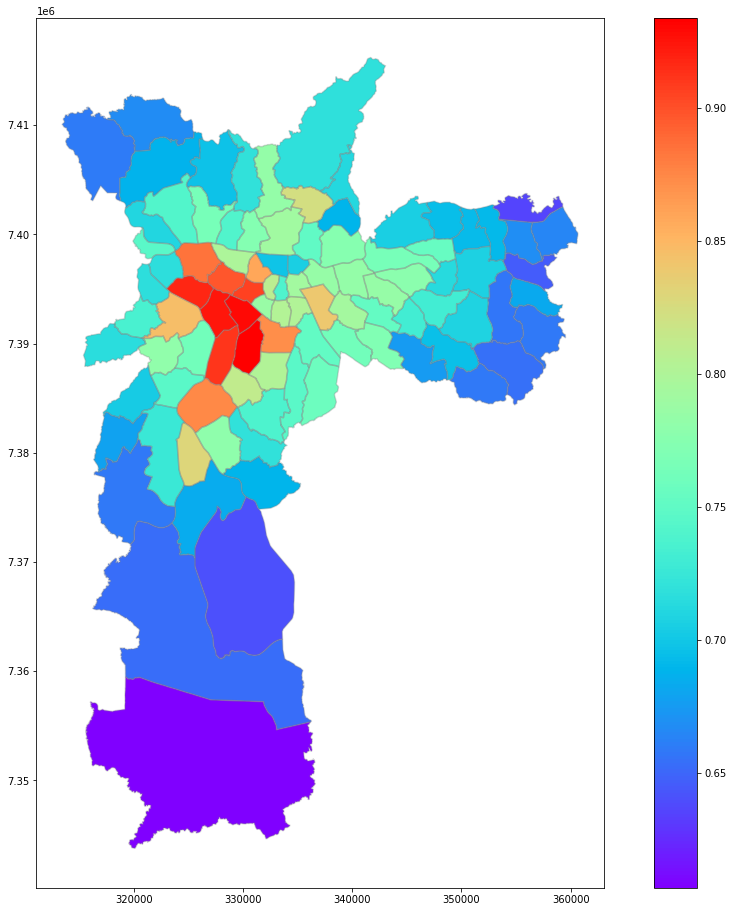

In [12]:
fig, ax = plt.subplots(figsize=(18,16))
distrito.boundary.plot(ax=ax, alpha=0.3, color='gray');
distrito.plot(ax=ax, alpha=0.3, color='lightgray');
idh_geo.plot(ax=ax, column='IDHM', legend=True, cmap='rainbow');

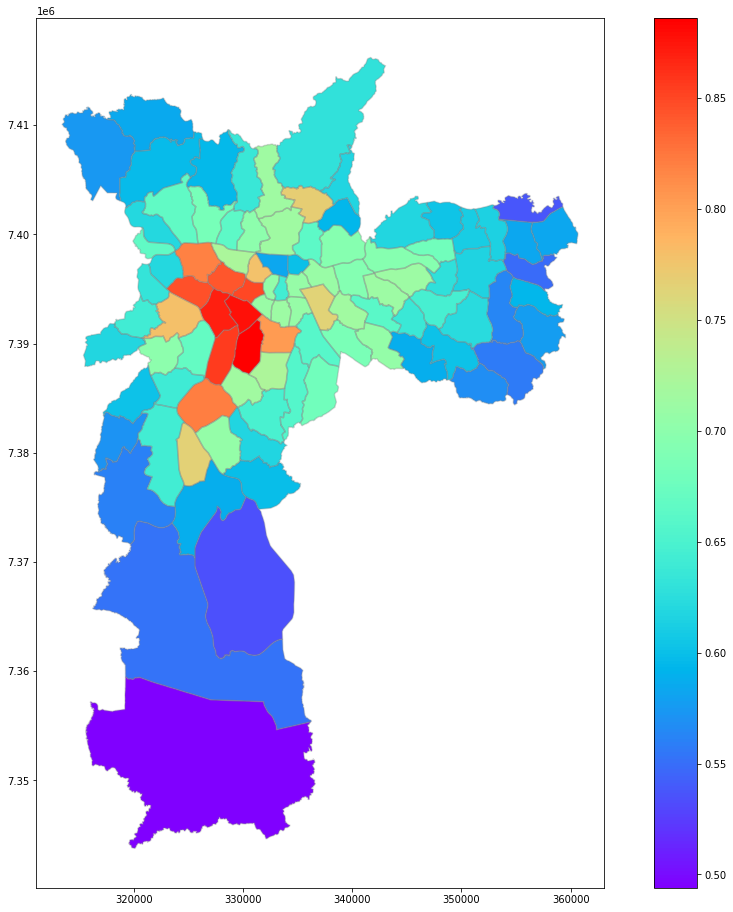

In [13]:
fig, ax = plt.subplots(figsize=(18,16))
distrito.boundary.plot(ax=ax, alpha=0.3, color='gray');
distrito.plot(ax=ax, alpha=0.3, color='lightgray');
idh_geo.plot(ax=ax, column='IDHM_E', legend=True, cmap='rainbow');

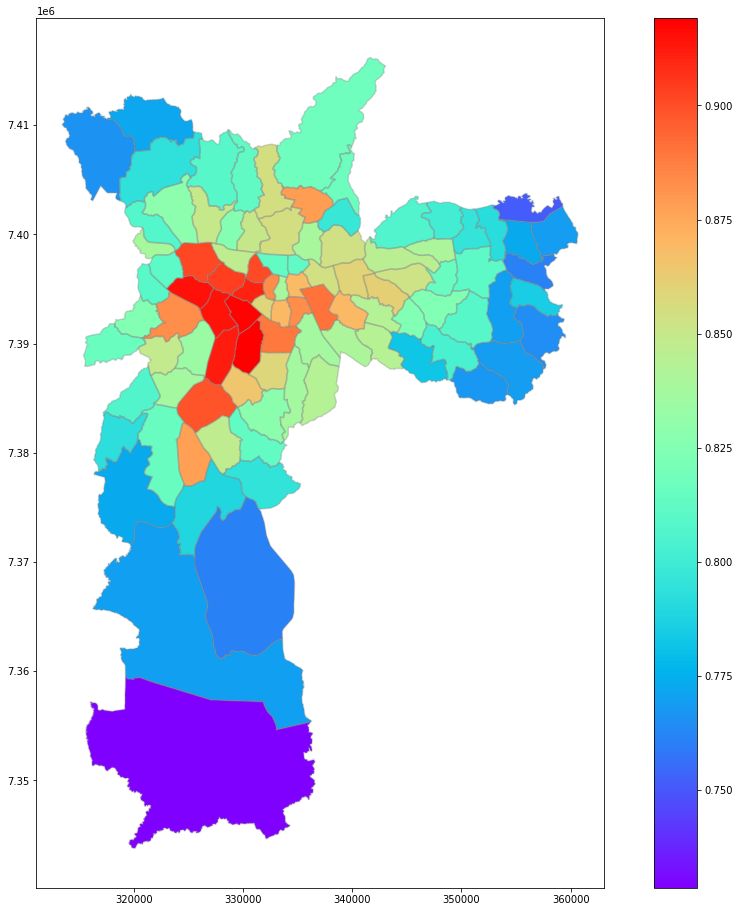

In [14]:
fig, ax = plt.subplots(figsize=(18,16))
distrito.boundary.plot(ax=ax, alpha=0.3, color='gray');
distrito.plot(ax=ax, alpha=0.3, color='lightgray');
idh_geo.plot(ax=ax, column='IDHM_L', legend=True, cmap='rainbow');

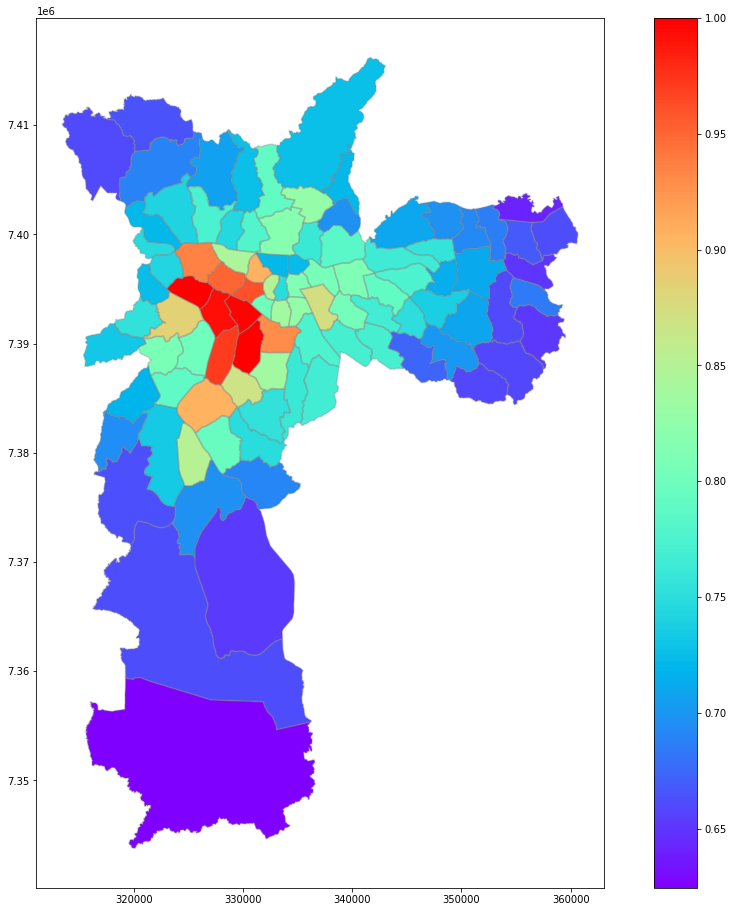

In [15]:
fig, ax = plt.subplots(figsize=(18,16))
distrito.boundary.plot(ax=ax, alpha=0.3, color='gray');
distrito.plot(ax=ax, alpha=0.3, color='lightgray');
idh_geo.plot(ax=ax, column='IDHM_R', legend=True, cmap='rainbow');

In [18]:
dens = gpd.read_file('/drive/MyDrive/Grupo Estudos/Geo Pandas/SAD69_SHP_densidade_demografica_2010/SAD69_SHP_densidade_demografica_2010.shp').set_crs(epsg=5533, allow_override=True)
dens.head()

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry
0,32355,355030865000149,573.0,0.100683,5691.134318,2010,2010,"POLYGON ((317486.010 7389051.382, 317448.681 7..."
1,32356,355030865000148,156.0,0.226534,688.637730,2010,2010,"POLYGON ((317448.681 7389065.315, 317433.615 7..."
2,24960,355030864000087,350.0,5.201065,67.293912,2010,2010,"POLYGON ((346025.451 7398135.567, 346029.820 7..."
3,24961,355030864000088,306.0,2.962862,103.278515,2010,2010,"POLYGON ((346125.616 7398312.151, 346060.047 7..."
4,24964,355030864000058,997.0,8.876239,112.322347,2010,2010,"POLYGON ((346510.160 7398716.529, 346536.116 7..."


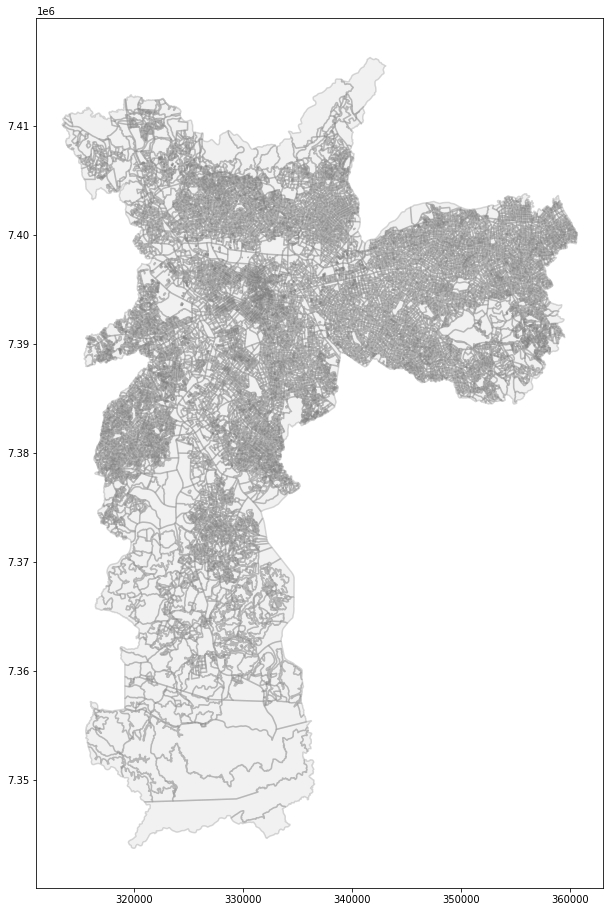

In [19]:
fig, ax = plt.subplots(figsize=(18,16))
dens.boundary.plot(ax=ax, alpha=0.3, color='gray');
dens.plot(ax=ax, alpha=0.3, color='lightgray');

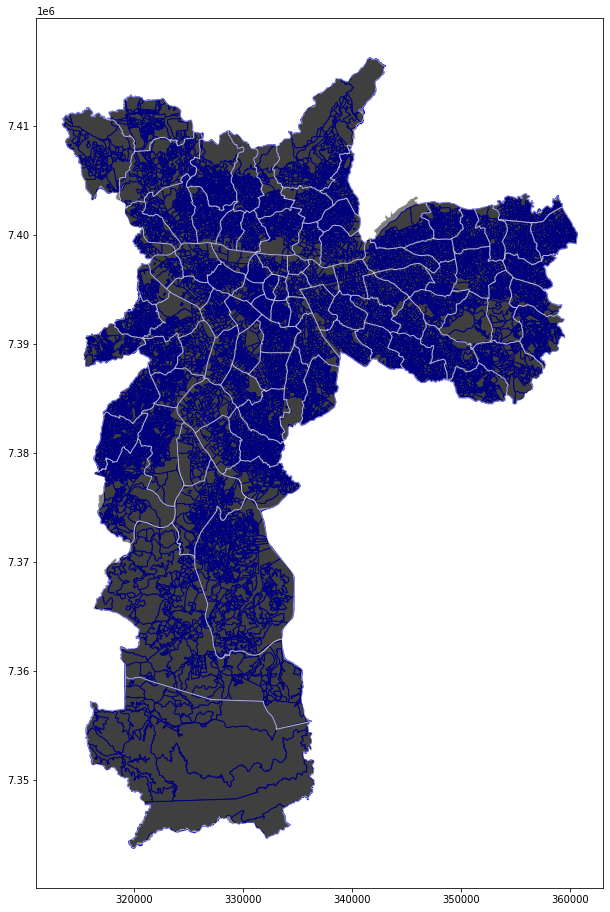

In [20]:
fig, ax = plt.subplots(figsize=(18,16))
dens.plot(color='gray', edgecolor='blue', ax=ax, legend=True)
distrito.plot(color='black', edgecolor='white', ax=ax, alpha=0.5, legend=True)

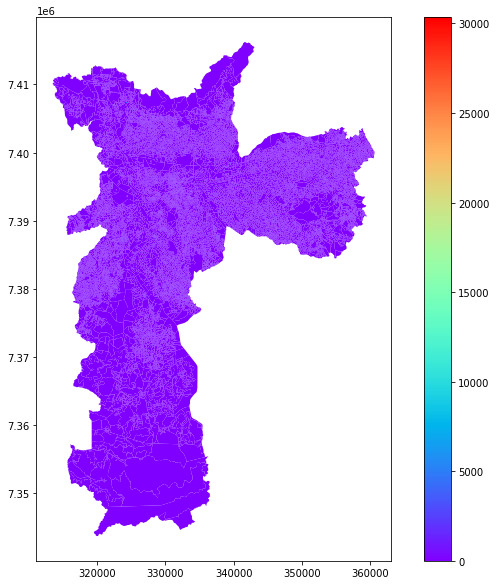

In [21]:
dens['habit_hect'] = dens['habit_hect'].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
dens.plot('habit_hect', ax=ax, cmap='rainbow', legend=True)

In [22]:
interpolation = area_interpolate(source_df=dens, 
                                 target_df=distrito,
                                 intensive_variables=['habit_hect'])

In [26]:
interpolation.head()

,habit_hect,geometry
0,81.403987,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,95.267703,"POLYGON ((338394.421 7394310.666, 338407.303 7..."
2,125.214197,"POLYGON ((329124.990 7402389.472, 329126.801 7..."
3,158.919415,"POLYGON ((331969.718 7385760.630, 331977.816 7..."
4,217.559970,"POLYGON ((332455.670 7378656.488, 332449.680 7..."


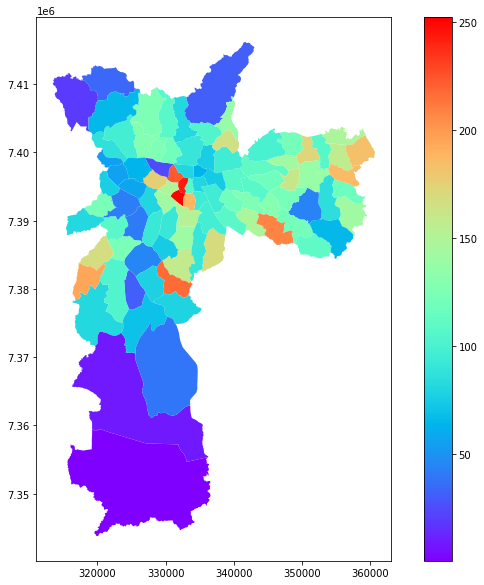

In [27]:
fig, ax = plt.subplots(figsize=(12,10))
interpolation.plot('habit_hect', ax=ax, cmap='rainbow', legend=True)